### <p style="text-align: right;"> &#9989; Qingxuan Zheng

# Homework Assignment #2 (Individual)
## Modeling the World Happiness Index

### Goals for this homework assignment
By the end of this assignment, you should be able to:
* Debug Python code.
* Get more experience with Pandas using excel spread sheets.
* Make plots of your model using <code>matplotlib</code>.
* Practice writing and executing a Python script.

### Assignment instructions

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

There are **25 points** possible on this assignment. Point values for each part are included in the section headers.

**This assignment is due at 11:59 pm on Friday, October 9th.** It should be uploaded into the "Homework Assignments" submission folder for Homework #2 in your D2L webpage.  Submission instructions can be found at the end of the notebook.

### Part 1: Reading, Describing, and Cleaning the Data (8 total points)
Before we read in the data and begin working with it, let's import the libraries that we would typically use for this task. You can always come back to this cell and import additional libraries that you need.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sea

The United Nations compiles an annual publication called the [World Happiness Report](https://en.wikipedia.org/wiki/World_Happiness_Report) that ranks countries by the "happiness score" or "life ladder". These scores are based on a surveys of citizens of each country on a variety of factors such as:
* Gross Domestic Product (GDP) per capita
* Perceptions of social support
* Life expectancy
* Freedom of choice

[Data from the UN](https://worldhappiness.report/) is available from 2005-2019, which we have downloaded in a `.csv` format. The survey has changed over time, so that some factors and questions have been omitted. So some of the data is incomplete or missing.

### 1.1 Read the data (2 points)

<font size=8 color="#009600">&#9998;</font> Do This - Read in the survey data from `happiness_index.csv` into a DataFrame and print the `.head()` of the data.

In [36]:
## your code here
report_data = pd.read_csv("happiness_index.csv")
report_data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-2017, unbalanced panel","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,2008,3.723590,7.144916,0.450662,50.799999,0.718114,0.178993,0.881686,0.517637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.314788,0.552308,51.200001,0.678896,0.201228,0.850035,0.583926,...,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2010,4.758381,7.421525,0.539075,51.599998,0.600127,0.131578,0.706766,0.618265,...,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2011,3.831719,7.394349,0.521104,51.919998,0.495901,0.173452,0.731109,0.611387,...,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2012,3.782938,7.480296,0.520637,52.240002,0.530935,0.246943,0.775620,0.710385,...,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2 Clean the data (3 total points)

#### 1.2.1 Remove and track excess data (1 point)

In order to build a linear regression model to predict the happiness score (`Life Ladder`), we need to remove the excess features that are not present in every year's data. 

<font size=8 color="#009600">&#9998;</font> Do This - Drop the columns that are not the following:
* Country name
* year
* Life Ladder
* Log GDP per capita
* Social support
* Healthy life expectancy at birth
* Freedom to make life choices
* Generosity
* Perceptions of corruption
* Positive affect
* Negative affect
* Confidence in national government
* Democratic Quality
* Delivery Quality

Make sure to make a list of the columns that you dropped. This is important if you need to report what you didn't consider in the model. Print the `.head()` of the DataFrame after dropping the unneeded columns.

In [37]:
## your code here
columns_to_drop = ['Standard deviation of ladder by country-year',
 'Standard deviation/Mean of ladder by country-year',
 'GINI index (World Bank estimate)',
 'GINI index (World Bank estimate), average 2000-2017, unbalanced panel',
 'gini of household income reported in Gallup, by wp5-year',
 'Most people can be trusted, Gallup',
 'Most people can be trusted, WVS round 1981-1984',
 'Most people can be trusted, WVS round 1989-1993',
 'Most people can be trusted, WVS round 1994-1998',
 'Most people can be trusted, WVS round 1999-2004',
 'Most people can be trusted, WVS round 2005-2009',
 'Most people can be trusted, WVS round 2010-2014']

for column in columns_to_drop:
    report_data = report_data.drop(column, axis=1)
    
report_data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality
0,Afghanistan,2008,3.723590,7.144916,0.450662,50.799999,0.718114,0.178993,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084
1,Afghanistan,2009,4.401778,7.314788,0.552308,51.200001,0.678896,0.201228,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025
2,Afghanistan,2010,4.758381,7.421525,0.539075,51.599998,0.600127,0.131578,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176
3,Afghanistan,2011,3.831719,7.394349,0.521104,51.919998,0.495901,0.173452,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221
4,Afghanistan,2012,3.782938,7.480296,0.520637,52.240002,0.530935,0.246943,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078


#### 1.2.2 Focus on the 2018 data (1 point)

Your data should include scores for a variety of years (2005-2019) for each country. Let's focus on a single year: 2018. 

<font size=8 color="#009600">&#9998;</font> Do This - Filter your data to focus only on the latest available data from 2018. Print the `.head()` of that DataFrame.

In [38]:
## your code here
idx = list(np.where(report_data.year == 2018)[0])
report_data = report_data.iloc[idx,:]
report_data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality
10,Afghanistan,2018,2.694303,7.458603,0.507516,52.599998,0.373536,-0.082319,0.927606,0.424125,0.404904,0.364666,-1.870725,-1.438761
22,Albania,2018,5.004403,9.417863,0.683592,68.699997,0.824212,0.008337,0.899129,0.713300,0.318997,0.435338,0.294235,-0.129403
30,Algeria,2018,5.043086,9.538646,0.798651,65.900002,0.583381,-0.167403,0.758704,0.591043,0.292946,NaN,-0.887384,-0.779863
48,Argentina,2018,5.792797,9.813678,0.899912,68.800003,0.845895,-0.203153,0.855255,0.820310,0.320502,0.261352,0.292617,-0.135139
62,Armenia,2018,5.062449,9.124537,0.814449,66.900002,0.807644,-0.146650,0.676826,0.581488,0.454840,0.670828,-0.266119,-0.063556


#### 1.2.3 Missing data (1 point)

Not all the countries have reported values for every feature. You should check if any countries have missing data. We could impute these missing data in a variety of ways, but instead to make our work a little simpler, we will simply drop a country if it has any missing data. However, we should keep track of any coutnries we drop to know which countries are excluded from the model.

<font size=8 color="#009600">&#9998;</font> Do This - Drop any country from the data that is missing data. Keep track of any countries you dropped from the data set (e.g., by printing or making a list).

In [39]:
## your code here
remain_country = list(report_data.dropna(axis=0)['Country name'])
country_dropped = list(report_data[report_data['Country name'].isin(remain_country) == False]['Country name'])
print(country_dropped)
report_data = report_data.dropna(axis=0)

['Algeria', 'Burundi', 'Cambodia', 'China', 'Cyprus', 'Egypt', 'Jordan', 'Kosovo', 'Laos', 'Libya', 'Maldives', 'Morocco', 'North Cyprus', 'Palestinian Territories', 'Saudi Arabia', 'Taiwan Province of China', 'Tajikistan', 'Turkmenistan', 'United Arab Emirates', 'Venezuela', 'Vietnam']


### 1.3 Describe the data (3 points)

Now that you have a cleaned data set, let's look into the data. We can start that by describing the data and making histograms of it. 

<font size=8 color="#009600">&#9998;</font> Do This - Focusing on the data collected in the survey (i.e., not the country name or year), describe the data and make histograms describing the distributions of the various features.

In [40]:
## your code here
for column in ['Country name', 'year']:
    report_data = report_data.drop(column, axis=1)
    
report_data.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality
10,2.694303,7.458603,0.507516,52.599998,0.373536,-0.082319,0.927606,0.424125,0.404904,0.364666,-1.870725,-1.438761
22,5.004403,9.417863,0.683592,68.699997,0.824212,0.008337,0.899129,0.713300,0.318997,0.435338,0.294235,-0.129403
48,5.792797,9.813678,0.899912,68.800003,0.845895,-0.203153,0.855255,0.820310,0.320502,0.261352,0.292617,-0.135139
62,5.062449,9.124537,0.814449,66.900002,0.807644,-0.146650,0.676826,0.581488,0.454840,0.670828,-0.266119,-0.063556
74,7.176993,10.724133,0.940137,73.599998,0.916028,0.143235,0.404647,0.759019,0.187456,0.468837,1.202361,1.761815


In [41]:
report_data.describe()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,5.539629,9.301184,0.813747,64.520548,0.782520,-0.021389,0.732900,0.709785,0.293109,0.501551,-0.023181,0.064975
std,1.123867,1.178485,0.115870,7.015459,0.118026,0.161363,0.191199,0.109544,0.089140,0.200848,0.847969,0.963460
min,2.694303,6.837319,0.503544,48.200001,0.373536,-0.331775,0.096563,0.424125,0.106871,0.079710,-2.376622,-1.802231
25%,4.769377,8.263374,0.739355,58.500000,0.716484,-0.137043,0.692341,0.642437,0.217146,0.343467,-0.625558,-0.682249
50%,5.513500,9.497988,0.845803,66.400002,0.797057,-0.039868,0.793758,0.735343,0.282063,0.476145,-0.102986,-0.152066
75%,6.249419,10.264216,0.909807,69.599998,0.874548,0.070828,0.855255,0.793368,0.357458,0.632478,0.678356,0.738143
max,7.858107,11.448219,0.965962,76.800003,0.969898,0.502898,0.952014,0.883581,0.543836,0.988120,1.582492,2.095614


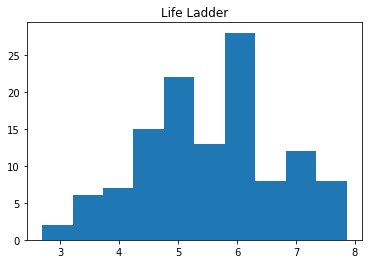

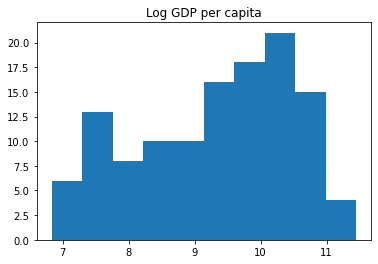

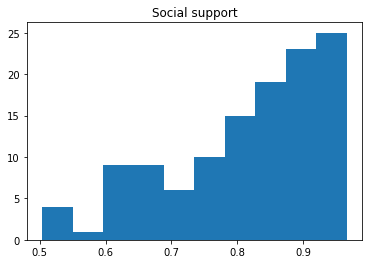

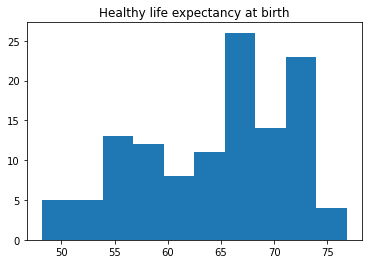

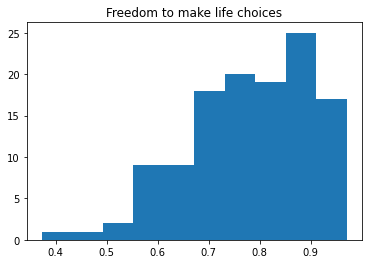

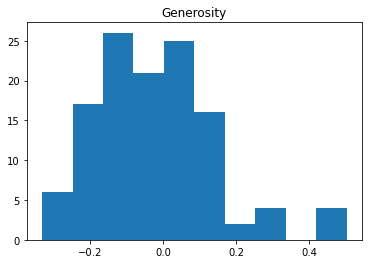

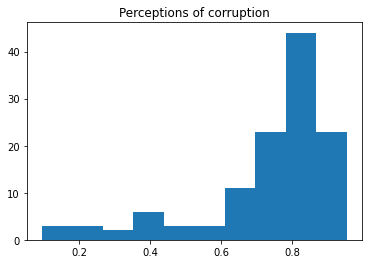

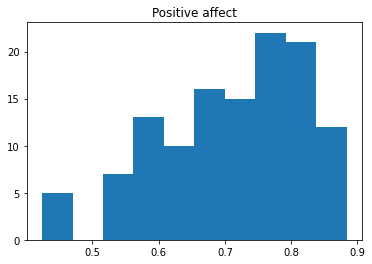

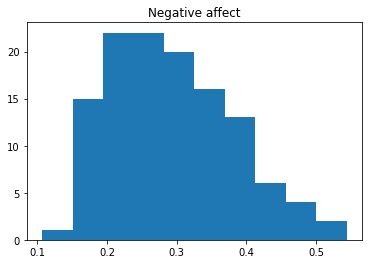

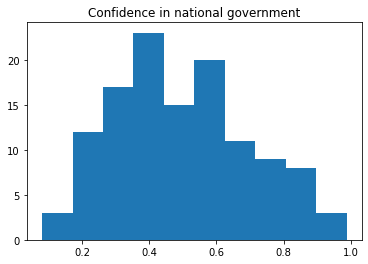

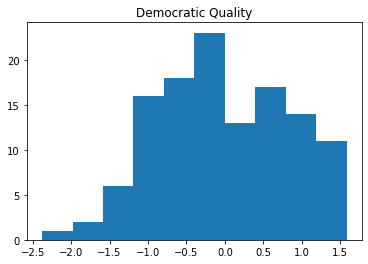

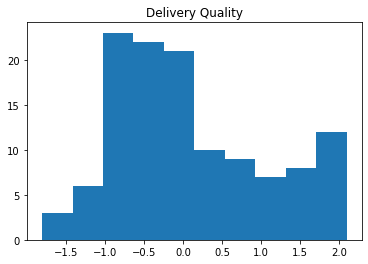

In [42]:
for column in report_data.columns:
    plt.hist(report_data[column])
    plt.title(column)
    plt.show()

## 2. Making a model (9 total points)

### 2.1 The correlation matrix (2 points total)

To get our model started, we need to first investigate the correlations between the variables. 

#### 2.1.1 Visualizing the correlation matrix (1 point)
Just the matrix isn't as useful as a visualization like a heat map of the correlation matrix.

<font size=8 color="#009600">&#9998;</font> Do This - For the variables in the survey (i.e., not the country and year), create a heat map that represents the correlation matrix. Answer the questions below as well.

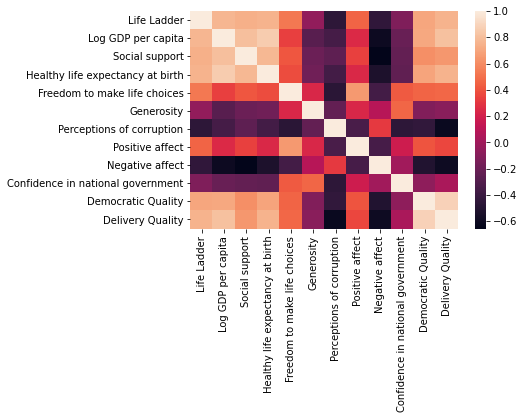

In [43]:
## your code here
heatmap_plot = sea.heatmap(report_data.corr())


#### 2.1.2 Determining which features will matter (1 point)

Look at your correlation matrix visualization, specifically at how the variables correlate with `Life Ladder`. Which variables do you expect to be most important to your linear model? How can you tell from the correlation matrix (be specific)?

<font size=8 color="#009600">&#9998;</font> For positive correlation, we choose 0.75 as threshold. For negative correlation, we choose -0.4 as threshold. The most important variables to my linear model are "Log GDP per capita", "Healthy life expectancy at birth", "Delivery Quality", and "Perceptions of corruption".

### 2.2 Constructing and evaluating the full model (7 points total)

We will start modeling our data by predicting the `Life Ladder` score based on all the remaining features. We will also evaluate the model using a variety of techniques.

#### 2.2.1 Build and summarize the model (2 points)

<font size=8 color="#009600">&#9998;</font> Do This - Construct a linear OLS regression model that predicts the `Life Ladder` score from the other features. Print the `.summary()` of the model. Make sure to answer the questions below.

In [44]:
## your code here
happy = report_data.pop('Life Ladder') #Delete lifeladder from the original table and return the value of lifeladder
features = sm.add_constant(report_data)
model_full = sm.OLS(happy, features)
full_estimate = model_full.fit()
full_estimate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Life Ladder   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     36.05
Date:                Fri, 09 Oct 2020   Prob (F-statistic):           2.56e-31
Time:                        16:34:44   Log-Likelihood:                -92.489
No. Observations:                 121   AIC:                             209.0
Df Residuals:                     109   BIC:                             242.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -1.5746      1.186     -1.327      0.187      -3.926       0.777
Log GDP per capita                    0.2240      0.116      1.923      0.057      -0.007       0.455
Social support                        3.1167      0.886      3.516      0.001       1.360       4.874
Healthy life expectancy at birth      0.0106      0.016      0.661      0.510      -0.021       0.042
Freedom to make life choices          1.7166      0.730      2.350      0.021       0.269       3.164
Generosity                            0.5558      0.380      1.464      0.146      -0.197       1.309
Perceptions of corruption            -0.8865      0.418     -2.120      0.036      -1.715      -0.058
Positive affect                       1.1575      0.654      1.769      0.080      -0.140       2.455
Negative affect                       2.8628      0.798      3.588      0.000       1.282       4.444
Confidence in national government    -1.0943      0.398     -2.747      0.007      -1.884      -0.305
Democratic Quality                    0.0118      0.142      0.084      0.933      -0.269       0.292
Delivery Quality                      0.2649      0.175      1.513      0.133      -0.082       0.612
==============================================================================
Omnibus:                        5.216   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                6.784
Skew:                          -0.166   Prob(JB):                       0.0336
Kurtosis:                       4.111   Cond. No.                     1.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 2.2.2 Evaluating model fit and determining important features (1 point)

Based on this full model, how well do the data fit a linear model? How can you tell? It is typical to use the threshold of $p<0.05$ to determine features that are important for a model. Which features appear to be most important to the linear model? How does this determination fit with your original determination from the correlation matrix (it's ok if the do not match exactly)?

<font size=8 color="#009600">&#9998;</font> R-squared is the proportional improvement in prediction from the regression model, compared to the mean model. It indicates the goodness of fit of the model. The value of R-squared is 0.784. It tells 78.4 perceents variation of happiness could be explained. Social support, Freedom to make life choices, Perceptions of corruption, Negative affect, and Confidence in national government are significant according 0.05 threshold value. And the importance is not fully in line with correlation.

#### 2.2.3 Evaluating fit using predicted values (2 points)

Another way to determine how well your model fits your data is to compare the predicted values and the actual values. If the model were perfect ($R^2 =1$), every predicted value and actual value would match exactly. This is generally not the case.

<font size=8 color="#009600">&#9998;</font> Do This - Plot the predicted values against the actual values of `Life Ladder`, include a line that would correspond to a perfect fit. Make sure to answer the questions below.

Text(0, 0.5, 'happiness')

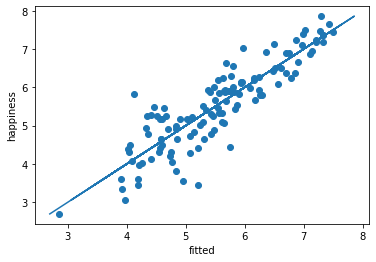

In [45]:
## your code here
fig, ax = plt.subplots()
prediction_full = full_estimate.fittedvalues # values estimated by full_model
ax.scatter(prediction_full,happy)
ax.plot(happy,happy)
plt.xlabel('fitted')
plt.ylabel('happiness')

How well do the predicted values of your model compare to the actual values? Does your model overpredict or underpredict `Life Ladder` scores for any range of scores? Are there any outliers in the predicted values or actual data?

<font size=8 color="#009600">&#9998;</font> Just like R-squared tells, this model's fitness is good. For happiness score lower than 4, all scores are underpredicted, scores in other range is not either underpredicted or overpredicted. 

#### 2.2.4 Determining feature relationships to the model (3 points)

Given the model, we should look into how the `Life Ladder` score changes based on each feature. This will help us better understand the model.

<font size=8 color="#009600">&#9998;</font> Do This - Create a scatter plot of the actual and predicted `Life Ladder` scores vs each feature in your model. Be sure to answer the questions below.

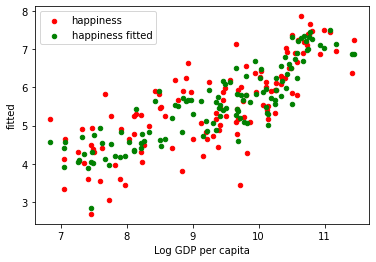

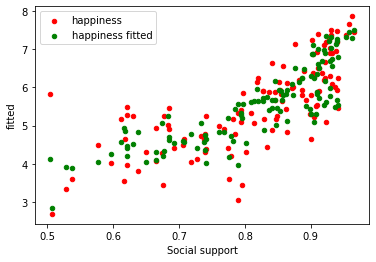

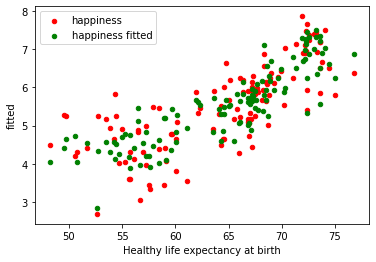

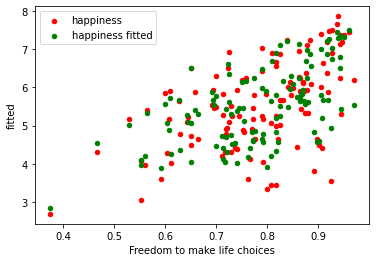

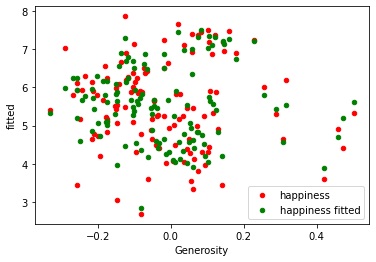

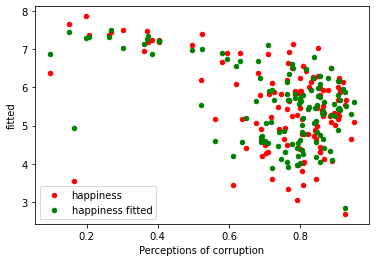

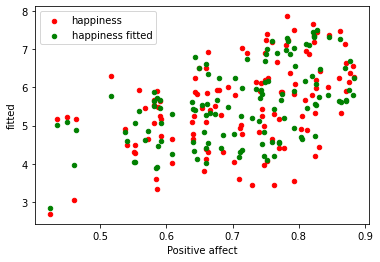

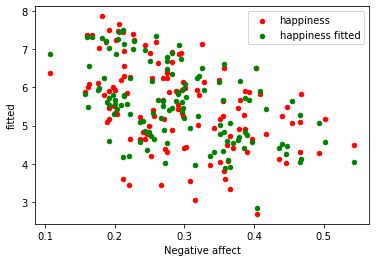

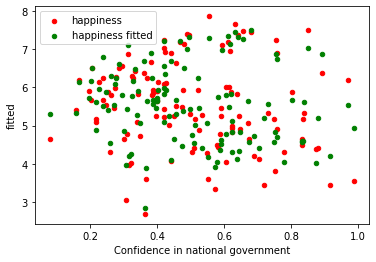

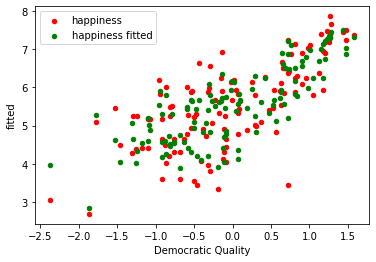

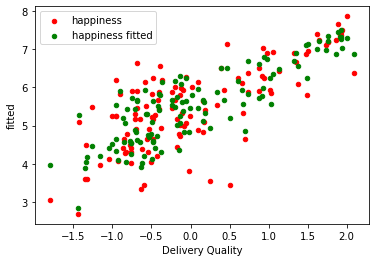

In [46]:
### your code here
tmp =pd.DataFrame()
tmp['happy'] = happy.copy()
tmp['fitted'] = full_estimate.fittedvalues
for key in report_data.keys():
    tmp[key] = report_data[key].values
    ax1 = tmp.plot(kind='scatter', x= key, y= 'happy', color='r', label = 'happiness')    
    ax2 = tmp.plot(kind='scatter', x=key, y= 'fitted', color='g', ax=ax1, label = 'happiness fitted')    
    plt.legend()

The coefficients in the linear model for each feature (i.e., in the `.summary()`) describe the model's slope contribution from each feature. Using the graphs you created, describe qualitatively how each coefficient in the model that you created fits with the plots. That is, do you see the linear relationships for each feature that you expect given the coefficients?

<font size=8 color="#009600">&#9998;</font> 

## 3. Creating a reduced model (8 total points)

From the work you have done above, it is probably clear that some features aren't particularly important for makng a linear model.

### 3.1 Selecting a reduced set of features (2 points)

Based on your analysis above, indicate which features you would drop from a reduced model. Explain why you would drop each of these features using the evidence for your analysis in the above section.

<font size=8 color="#009600">&#9998;</font> I drop the features far from siginificant in full models. And I drop the varibales of Healthy life expectancy at birth, Generosity, Democratic Quality, and Delivery Quality because it coefficients are not significant at 1% level. Then I drop Negative affect, whose directions in plot and cofficent are different.

## 3.2 Creating a reduced model (6 points)

Now that you have determined which features you will exclude from your reduced model, let's construct that reduced model.

<font size=8 color="#009600">&#9998;</font> Do This - Create the reduced linear OLS model using only the subset of features that you indicated above. Print the summary of the results of the model fit. Be sure to answer the questions below.

In [47]:
## your code here
reduce_df = ['Social support', 'Log GDP per capita', 'Freedom to make life choices', 'Perceptions of corruption','Positive affect', 'Confidence in national government']
reduce_df = features[reduce_df]
features = sm.add_constant(reduce_df)
model_reduced = sm.OLS(happy,features)
reduce_estimate = model_reduced.fit()
reduce_estimate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Life Ladder   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     55.16
Date:                Fri, 09 Oct 2020   Prob (F-statistic):           1.87e-31
Time:                        16:34:47   Log-Likelihood:                -102.93
No. Observations:                 121   AIC:                             219.9
Df Residuals:                     114   BIC:                             239.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.1818      0.853     -0.213      0.832      -1.872       1.508
Social support                        2.0247      0.856      2.366      0.020       0.330       3.720
Log GDP per capita                    0.3449      0.083      4.150      0.000       0.180       0.509
Freedom to make life choices          2.2962      0.742      3.095      0.002       0.827       3.766
Perceptions of corruption            -1.3892      0.375     -3.702      0.000      -2.133      -0.646
Positive affect                       1.0162      0.653      1.555      0.123      -0.278       2.311
Confidence in national government    -1.2639      0.384     -3.295      0.001      -2.024      -0.504
==============================================================================
Omnibus:                        7.687   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                9.647
Skew:                          -0.356   Prob(JB):                      0.00804
Kurtosis:                       4.186   Cond. No.                         176.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2 points
Based on these results, compare the fit of this reduced model to the full model. What evidence are you using to make this comparison?

<font size=8 color="#009600">&#9998;</font> Only positive affect is not significant in reduced model. Log-Liklihood and BIC are lower in reduced model, which suggest better goodness, but AIC is higher.

#### 3.3 Continuing to evaluate the reduced model (4 points)

While we have used the summary to evaluate the model, we should do a deeper investigation into the model fit.

<font size=8 color="#009600">&#9998;</font> Do This - Using the techniques described in Section 2, or other methods of your choosing, evaluate the model fit using **at least** two additional methods. Be sure to answer the questions below.

2.5617957683631045e-31
0.7626537066009725
1.8682923051618609e-31
0.7303035011891895


Text(0, 0.5, 'happiness')

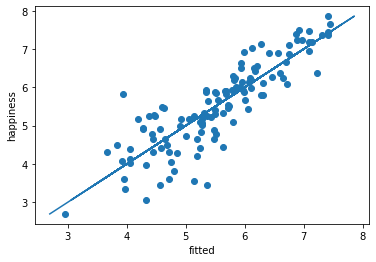

In [48]:
## your code here
print(full_estimate.f_pvalue)
print(full_estimate.rsquared_adj)
print(reduce_estimate.f_pvalue)
print(reduce_estimate.rsquared_adj)

fig, ax = plt.subplots()
prediction_reduced = reduce_estimate.fittedvalues
ax.scatter(prediction_reduced,happy)
ax.plot(happy,happy)
plt.xlabel('fitted')
plt.ylabel('happiness')

Based on your analysis above, how does the reduced model compare to the full model? Is the reduced model believable? 

Summarize the steps that you used to build and evaluate the quality of the reduced model.

<font size=8 color="#009600">&#9998;</font> According to F test, both model are siginificant. And according adjust  R-squared, full model is better. The scatter plot does not show significant improvement.

---
### Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [50]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://docs.google.com/forms/d/e/1FAIpQLSeiTaur6kllgiUknZSulXqe9JFkD88EUjf1r8pWBV2DuABXdQ/viewform?usp=sf_link" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework #2, and upload it there.

&#169; Copyright Michigan State University Board of Trustees